In [20]:
import torch 
import seaborn as sns

In [2]:
model = torch.load('/home/sidd_s/scratch/saved_models/Protoseg/hrnet_w48_proto_lr1x_hrnet_proto_80k_latest.pth')

In [3]:
protos=model['state_dict']['module.prototypes']

### self similarity between intra protos...mostly same!

In [12]:
feat=protos.view(-1,protos.shape[-1])

In [13]:
feat.shape

torch.Size([190, 720])

In [18]:
simi=feat @ feat.t() # self similarity like covariance 

In [19]:
simi=simi.cpu().numpy()

<Axes: >

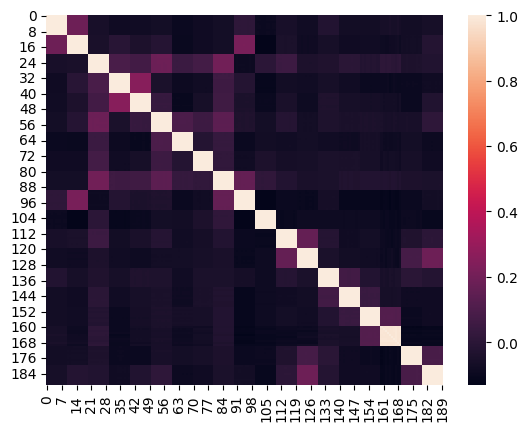

In [21]:
sns.heatmap(simi)

In [22]:
print(simi[0,:10])

[1.         1.0000001  1.         0.99999994 1.         0.99999994
 1.         1.         1.         0.99999994]


In [23]:
print(simi[100,100:110])

[1.        0.9999995 0.9999992 0.9999996 0.9999981 0.9999997 0.9999988
 0.9999991 0.9999997 0.9999998]


In [24]:
simi.shape

(190, 190)

### semantic similarity between protos (different class)

In [26]:
protos.shape

torch.Size([19, 10, 720])

In [53]:
protos[0].shape

torch.Size([10, 720])

In [49]:
cs = torch.mm(protos[0], protos[1].T)

In [50]:
cs.shape

torch.Size([10, 10])

In [52]:
# cs

In [54]:
protos[0][0].shape

torch.Size([720])

In [56]:
cs = torch.matmul(protos[0][0], protos[1][0].T)

In [57]:
cs

tensor(0.1859, device='cuda:0')

In [58]:
cs = torch.matmul(protos[0][0], protos[2][0].T)

In [59]:
cs

tensor(-0.0557, device='cuda:0')

In [60]:
cs = torch.matmul(protos[0][0], protos[3][0].T)

In [61]:
cs

tensor(-0.0825, device='cuda:0')